In [2]:
# !wget 'https://github.com/arunponnusamy/cvlib/releases/download/v0.2.0/gender_detection.model'

In [4]:
# !pip install cvlib

In [5]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.utils import get_file
import numpy as np
import matplotlib.pyplot as plt
import cv2, os
import cvlib as cv

In [6]:
# download pre-trained model
model = load_model("gender_detection.model")

In [24]:
# Read input image
image = cv2.imread("../images/he.jpg")

In [25]:
face, confidence = cv.detect_face(image)

In [26]:
face

[[447, 73, 584, 256]]

In [27]:
classes = ['man', 'woman']

In [28]:
# loop through deteted faces
for idx, f in enumerate(face):
    # get corner points of face rectangle
    (start_x, start_y) = f[0], f[1]
    (end_x, end_y) = f[2], f[3]

    # draw rectangle over face
    cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0, 255,0), 2)

    # crop the detected face region
    face_crop = np.copy(image[start_y:end_y, start_x:end_x])

    # preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (96,96))
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # apply gender detction on face
    conf = model.predict(face_crop)[0]
    print(conf)
    print(classes)

    # get lable with max accuracy
    idx = np.argmax(conf)
    label = classes[idx]

    label = "{}:{:.2f}%.".format(label,conf[idx]*100)

    Y = start_y - 10 if start_y - 10 > 10 else start_y + 10

    # write label and confidence above face rectangle
    cv2.putText(image, label, (start_x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

1/1 [==============================] - 0s 30ms/step
[1.0000000e+00 1.2988033e-09]
['man', 'woman']


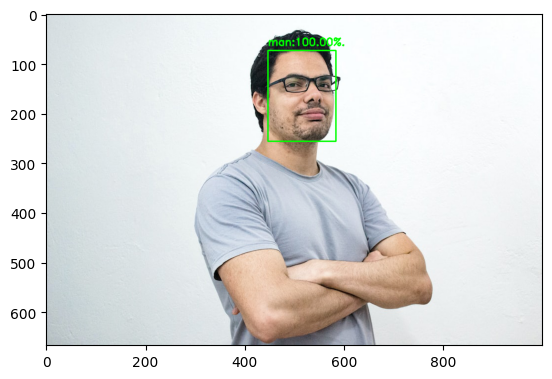

In [29]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)